# Proyek Analisis Data: Bike-sharing-dataset
source : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

- Nama:     Mohamad Imam Firdaus
- Email:    mohamadimamfirdaus17@gmail.com
- Id Dicoding: imamfrd

<pre>
This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index
dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from [Web Link])
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered
</pre>

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan kondisi cuaca sepanjang tahun 2011 dan 2012?
- Kapan orang paling sering menggunakan rental sepeda dan kapan orang paling jarang menggunakan rental sepeda?
- Apakah ada hubungan antara cuaca dan jumlah rental sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
# Let's import:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

## Data Wrangling

### Gathering Data

In [2]:
day_bikes = pd.read_csv("./Bike-sharing-dataset/day.csv")
day_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_bikes = day_bikes.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [4]:
day_bikes['dteday'] = day_bikes['dteday'].astype('datetime64')

In [5]:
day_bikes['years'] = day_bikes['year'] + 2011


### Assessing Data

In [6]:
day_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
 16  years       731 non-null  

In [7]:
day_bikes.isna().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
years         0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_bikes.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
value = day_bikes['registered'] + day_bikes['casual']
if any(day_bikes['count'] == value):
    print("CNT is equal to the sum of registered and casual")
else:
    print("CNT is not equal to the sum of registered and casual")

CNT is equal to the sum of registered and casual


### Cleaning Data

In [10]:
day_bikes = day_bikes.drop(columns = ['instant', "workingday", "temp", "atemp", "humidity", "windspeed"])

## Exploratory Data Analysis (EDA)

In [11]:
day_bikes.describe(include="all")

,dteday,season,year,month,holiday,weekday,weather,casual,registered,count,years
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,1.395349,848.176471,3656.172367,4504.348837,2011.500684
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.544894,686.622488,1560.256377,1937.211452,0.500342
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000,2011.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,315.500000,2497.000000,3152.000000,2011.000000


### Explore correlation between columns

In [12]:
print(day_bikes.corr())

              season      year     month   holiday   weekday   weather    casual  registered     count     years
season      1.000000 -0.001844  0.831440 -0.010537 -0.003080  0.019211  0.210399    0.411623  0.406100 -0.001844
year       -0.001844  1.000000 -0.001792  0.007954 -0.005461 -0.048727  0.248546    0.594248  0.566710  1.000000
month       0.831440 -0.001792  1.000000  0.019191  0.009509  0.043528  0.123006    0.293488  0.279977 -0.001792
holiday    -0.010537  0.007954  0.019191  1.000000 -0.101960 -0.034627  0.054274   -0.108745 -0.068348  0.007954
weekday    -0.003080 -0.005461  0.009509 -0.101960  1.000000  0.031087  0.059923    0.057367  0.067443 -0.005461
weather     0.019211 -0.048727  0.043528 -0.034627  0.031087  1.000000 -0.247353   -0.260388 -0.297391 -0.048727
casual      0.210399  0.248546  0.123006  0.054274  0.059923 -0.247353  1.000000    0.395282  0.672804  0.248546
registered  0.411623  0.594248  0.293488 -0.108745  0.057367 -0.260388  0.395282    1.000000  0.

### Explore the weather condition during 2011 and 2012

#### Per month basis

In [13]:
# How many times the weather was clear, cloudy, light snow or heavy rain during the year of 2011 and 2012?

# aggregate per month
day_bikes['month_year'] = day_bikes['dteday'].dt.to_period('M')\

# visualize
weather_seasonal = day_bikes.groupby('month_year')['weather'].value_counts()
print(weather_seasonal)

month_year  weather
2011-01     1          17
            2          13
            3           1
2011-02     1          19
            2           9
2011-03     1          17
            2          12
            3           2
2011-04     2          15
            1          14
            3           1
2011-05     1          19
            2          12
2011-06     1          21
            2           9
2011-07     1          27
            2           4
2011-08     1          23
            2           8
2011-09     2          16
            1          11
            3           3
2011-10     1          18
            2          10
            3           3
2011-11     1          20
            2           7
            3           3
2011-12     1          20
            2           9
            3           2
2012-01     1          20
            2          11
2012-02     1          18
            2          10
            3           1
2012-03     1          19
            2     

In [14]:
day_bikes.groupby('month_year').agg({"weather": "mean"})

,weather
month_year,
2011-01,1.483871
2011-02,1.321429
2011-03,1.516129
2011-04,1.566667
2011-05,1.387097
2011-06,1.300000
2011-07,1.129032
2011-08,1.258065
2011-09,1.733333


#### Per season basis

In [15]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

day_bikes['season'] = day_bikes['dteday'].dt.month.apply(get_season)

# visualize
print(day_bikes.groupby(["years", 'season'])['weather'].value_counts())

years  season  weather
2011   Autumn  1          49
               2          33
               3           9
       Spring  1          50
               2          39
               3           3
       Summer  1          71
               2          21
       Winter  1          56
               2          31
               3           3
2012   Autumn  1          58
               2          31
               3           2
       Spring  1          60
               2          31
               3           1
       Summer  1          69
               2          22
               3           1
       Winter  1          50
               2          39
               3           2
Name: weather, dtype: int64


### Explore the number of bike rent during 2011 and 2012

#### Per month basis

In [16]:
# How many bikes were rented during the year of 2011 and 2012?

day_bikes.groupby('month_year')['count'].sum()

month_year
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Freq: M, Name: count, dtype: int64

In [17]:
# How many bikes were rented during the year of 2011 and 2012?

day_bikes.groupby('month_year')['casual'].sum()

month_year
2011-01     3073
2011-02     6242
2011-03    12826
2011-04    22346
2011-05    31050
2011-06    30612
2011-07    36452
2011-08    28842
2011-09    26545
2011-10    25222
2011-11    15594
2011-12     8448
2012-01     8969
2012-02     8721
2012-03    31618
2012-04    38456
2012-05    44235
2012-06    43294
2012-07    41705
2012-08    43197
2012-09    43778
2012-10    34538
2012-11    21009
2012-12    13245
Freq: M, Name: casual, dtype: int64

In [18]:
# How many bikes were rented during the year of 2011 and 2012?

day_bikes.groupby('month_year')['registered'].sum()

month_year
2011-01     35116
2011-02     41973
2011-03     51219
2011-04     72524
2011-05    104771
2011-06    112900
2011-07    104889
2011-08    107849
2011-09    100873
2011-10     98289
2011-11     86573
2011-12     78875
2012-01     87775
2012-02     94416
2012-03    133257
2012-04    135768
2012-05    151630
2012-06    159536
2012-07    161902
2012-08    171306
2012-09    174795
2012-10    164303
2012-11    131655
2012-12    110468
Freq: M, Name: registered, dtype: int64

#### Per season basis

In [19]:
# How many bikes were rented during the year of 2011 and 2012?

day_bikes.groupby(["years", 'season'])['count'].sum()

years  season
2011   Autumn    353096
       Spring    294736
       Summer    421544
       Winter    173727
2012   Autumn    570078
       Spring    534964
       Summer    620940
       Winter    323594
Name: count, dtype: int64

In [20]:
# How many bikes were rented during the year of 2011 and 2012?

day_bikes.groupby(["years", 'season'])['casual'].sum()

years  season
2011   Autumn     67361
       Spring     66222
       Summer     95906
       Winter     17763
2012   Autumn     99325
       Spring    114309
       Summer    128196
       Winter     30935
Name: casual, dtype: int64

In [21]:
# How many bikes were rented during the year of 2011 and 2012?

day_bikes.groupby(["years", 'season'])['registered'].sum()

years  season
2011   Autumn    285735
       Spring    228514
       Summer    325638
       Winter    155964
2012   Autumn    470753
       Spring    420655
       Summer    492744
       Winter    292659
Name: registered, dtype: int64

## Visualization & Explanatory Analysis

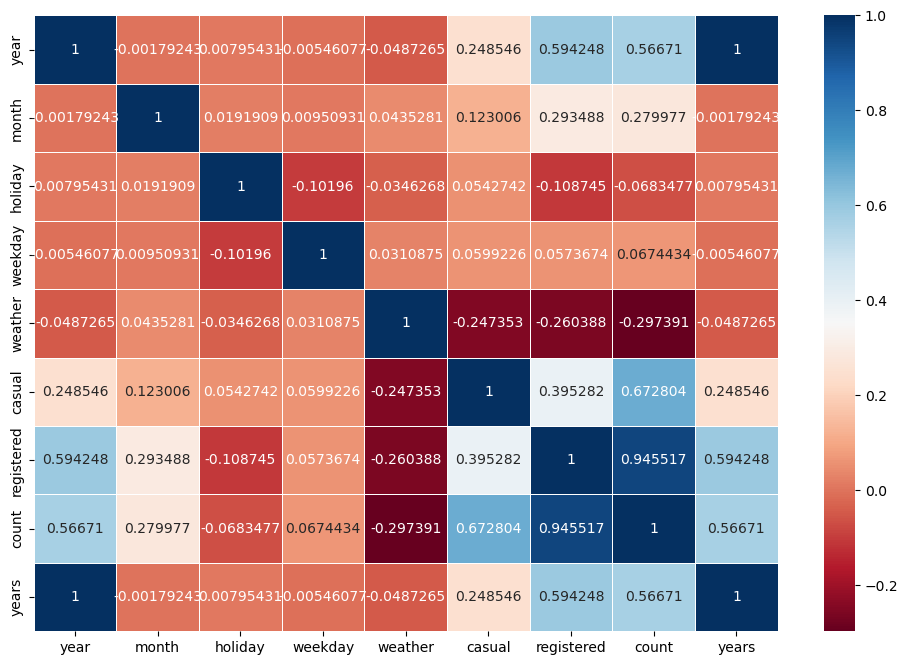

In [22]:
fig = plt.figure(figsize=(12,8))
corr = day_bikes.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

##### Pertanyaan 1 : Bagaimana perubahan kondisi cuaca sepanjang tahun 2011 dan 2012?

<Figure size 1200x600 with 0 Axes>

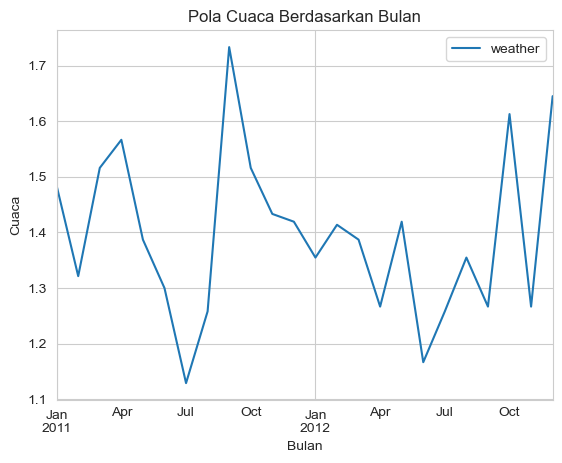

In [23]:
weather_mean = day_bikes.groupby('month_year').agg({"weather": "mean"})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
weather_mean.plot()
plt.title("Pola Cuaca Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Cuaca")
plt.show()

<Figure size 1200x600 with 0 Axes>

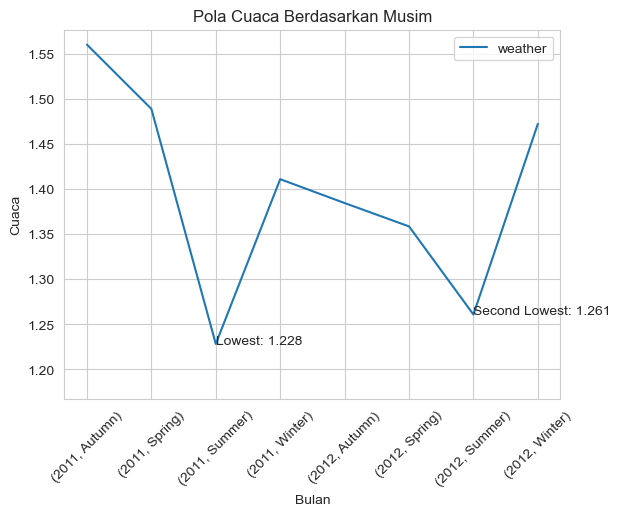

In [24]:
weather_seasonal = day_bikes.groupby(["years", 'season']).agg({"weather": "mean"})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
weather_seasonal.plot()

lowest_point = weather_seasonal.reset_index()['weather'].idxmin()
lowest_value = weather_seasonal['weather'].min()

second_lowest_value = weather_seasonal.reset_index().sort_values('weather').reset_index().loc[1, 'weather']
reset_idx = weather_seasonal.reset_index()
second_lowest_point = reset_idx[reset_idx["weather"] == second_lowest_value].index[0]

# Set the range of x-axis and y-axis
plt.ylim(lowest_value - 0.05 * lowest_value)

# Annotate the lowest point
plt.annotate(f'Lowest: {lowest_value:.4}', xy=(lowest_point, lowest_value), xytext=(lowest_point, lowest_value),
             arrowprops=dict(facecolor='orange', arrowstyle='->'))

# Annotate the second lowest point
plt.annotate(f'Second Lowest: {second_lowest_value:.4}', xy=(second_lowest_point, second_lowest_value), 
             xytext=(second_lowest_point, second_lowest_value),
             arrowprops=dict(facecolor='orange', arrowstyle='->'))

plt.xticks(rotation=45)

plt.title("Pola Cuaca Berdasarkan Musim")
plt.xlabel("Bulan")
plt.ylabel("Cuaca")
plt.show()

Plot di atas menunjukkan hubungan cuaca dan bulan pada tahun 2011 dan 2012. Data cuaca menunjukkan kondisi cuaca pada suatu hari. Semakin tinggi nilai cuaca, semakin sering pada rentang waktu tersebut terjadi hujan. Pada grafik dapat di lihat terdapat siklus tahunan dimana puncak berada pada awal tahun/musim dingin dan lembah berada pada tengah tahun/musim panas. Ini menunjukkan cuaca kurang baik lebih sering terjadi pada musim dingin dan cuaca cerah lebih sering terjadi pada musim panas.

##### Pertanyaan 2 : Kapan orang paling sering menggunakan rental sepeda dan kapan orang paling jarang menggunakan rental sepeda?

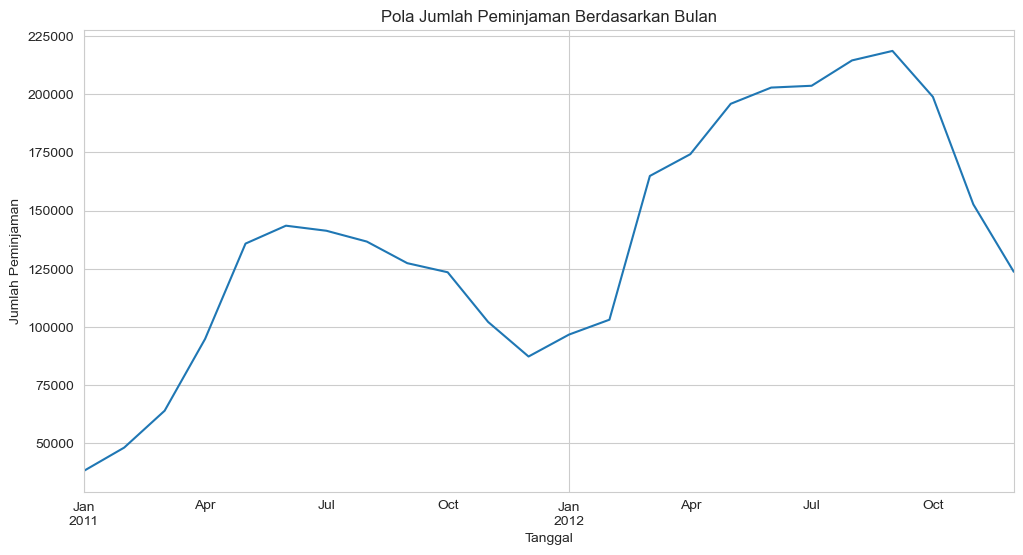

In [25]:
weather_seasonal = day_bikes.groupby('month_year')['count'].sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

weather_seasonal.plot()

plt.title("Pola Jumlah Peminjaman Berdasarkan Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.show()

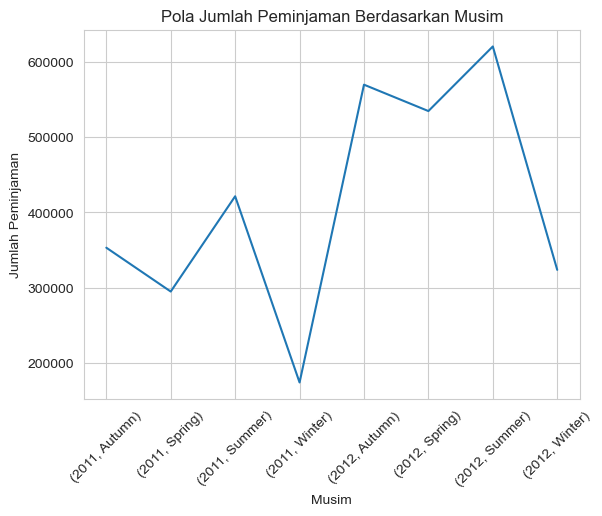

In [26]:
day_bikes.groupby(["years", 'season'])['count'].sum().plot()
plt.xticks(rotation=45)
plt.title("Pola Jumlah Peminjaman Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

Pada grafik terdapat garis yang menunjukkan hubungan antara bulan/musim dan jumlah rental. Jumlah peminjaman adalah total dari peminjaman kasual dan peminjaman terdaftar. Pada grafik di atas, terdapat 2 maksima, yaitu pada musim panas tahun 2011 dan 2012. Dapat juga diamati bahwa grafik di atas memiliki 2 minima pada sekitar bulan Januari di tahun 2011 dan 2012. Tetapi, maksima dan  minima pada tahun 2012 lebih tinggi dari 2011. Ini menunjukkan terdapat trend menanjak pada grafik tersebut.

##### Pertanyaan 3 : Apakah ada hubungan antara cuaca dan jumlah rental sepeda?

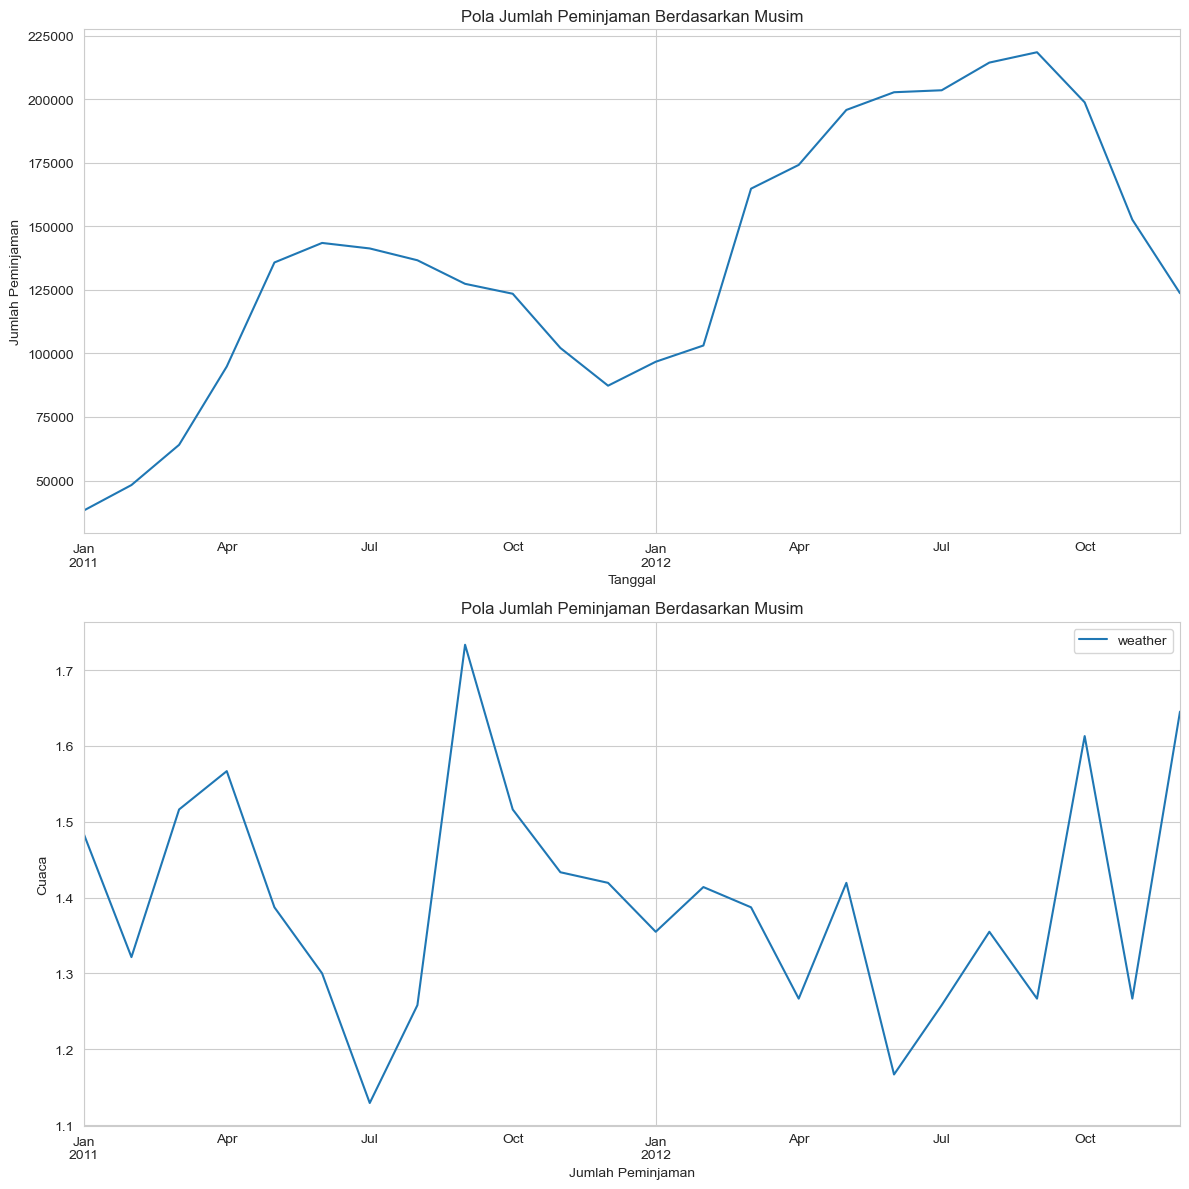

In [27]:
weather_seasonal = day_bikes.groupby('month_year')['count'].sum()
weather_mean = day_bikes.groupby('month_year').agg({"weather": "mean"})

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1
weather_seasonal.plot(ax=axes[0])
axes[0].set_title("Pola Jumlah Peminjaman Berdasarkan Musim")
axes[0].set_xlabel("Tanggal")
axes[0].set_ylabel("Jumlah Peminjaman")

# Plot 2
weather_mean.plot(ax=axes[1])
axes[1].set_title("Pola Jumlah Peminjaman Berdasarkan Musim")
axes[1].set_xlabel("Jumlah Peminjaman")
axes[1].set_ylabel("Cuaca")

plt.tight_layout()
plt.show()


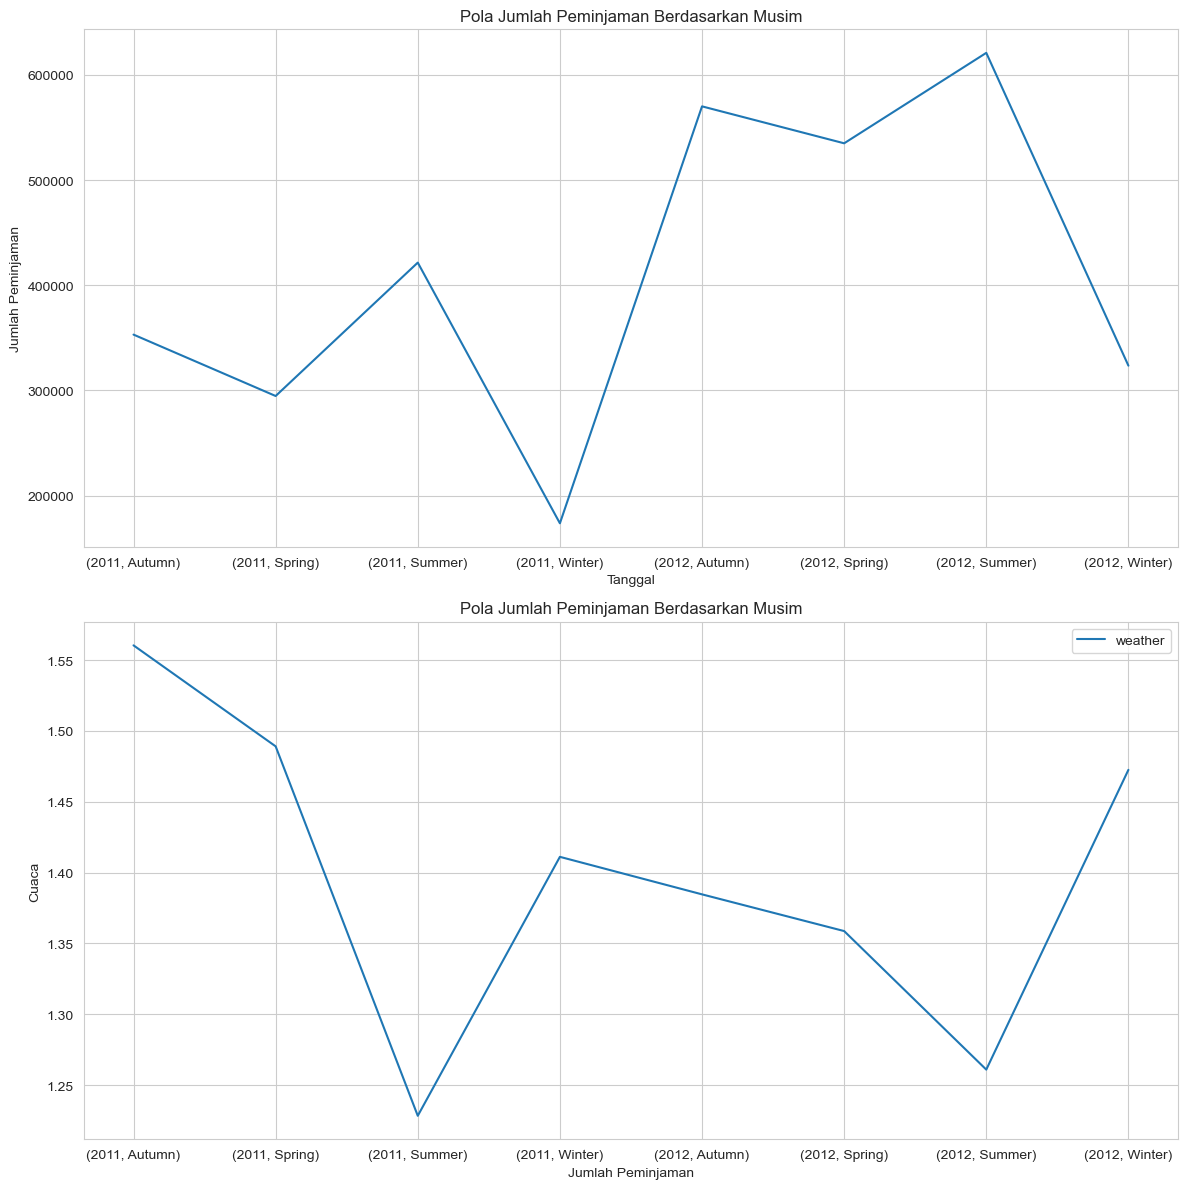

In [28]:
weather_seasonal = day_bikes.groupby(["years", 'season'])['count'].sum()
weather_mean = day_bikes.groupby(["years", 'season']).agg({"weather": "mean"})

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1
weather_seasonal.plot(ax=axes[0])
axes[0].set_title("Pola Jumlah Peminjaman Berdasarkan Musim")
axes[0].set_xlabel("Tanggal")
axes[0].set_ylabel("Jumlah Peminjaman")

# Plot 2
weather_mean.plot(ax=axes[1])
axes[1].set_title("Pola Jumlah Peminjaman Berdasarkan Musim")
axes[1].set_xlabel("Jumlah Peminjaman")
axes[1].set_ylabel("Cuaca")

plt.tight_layout()
plt.show()


Pada grafik di atas dapat dilihat kondisi cuaca dan jumlah pengunjung di waktu yang sama. Pada saat parameter cuaca tinggi, jumlah peminjaman cenderung rendah dan sebaliknya. Pada tabel korelasi pun, terlihat korelasi negatif antara jumlah rental dan cuaca.

## Conclusion

- Kondisi cuaca berubah sesuai dengan perubahan musim, musim panas kondisi cuaca cenderung cerah dan memiliki sedikit hujan dan pada waktu musim gugur dan musim dingin terdapat lebih banyak cuaca yang tidak cerah.
- Jumlah pengguna rental mengikuti siklus tahunan dengan kecenderungan menanjak. Siklus tahunan ini memiliki puncak pada sekitar bulan Mei-Juli dan lembah pada bulan Desember-Februari.
- Terdapat korelasi negatif terhadap kondisi cuaca dan jumlah rental sepeda. Pada musim dingin dan musim gugur dimana kondisi cuaca kurang cerah, penggunaan rental sepeda relatif sedikit. Pada musim semi penggunaan rental bertambah dan berpuncak pada musim panas.